In [1]:
### Simeon Drapeau
#ECE 404/504
#March 23, 2019
#Project 2

#This is a 2D FDTD of EM wave through air & soil
#Inspired by D.M. Sullivan's "Electromagnetic Simulation Using The FDTD Method"


import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams.update({'font.size': 14})
from numpy import exp
from pylab import *
from numpy import outer

IE = 60
JE = 60

ga = np.zeros((IE,JE))
dz = np.zeros((IE,JE))
ez = np.zeros((IE,JE))
hx = np.zeros((IE,JE))
hy = np.zeros((IE,JE))

#  The Constants #

pi = 3.14159
ic = int(IE/2)
jc = int(JE/2)
ddx = 0.01
dt = ddx/6e8
epsz = 8.8e-12
sigma = 1.0         #Soil = 0.1329@100MHz #or 0.1@1.5GHz     #Air = 1.0
epi = 1.0006        #Soil = 6.912@100MHz #or 6.50@1.5GHz     #Air =1.0006
freq = 1.5*1e9      #1.5*1e9 or 1e8

for i in range(JE):
    for j in range(IE):
        ga[(i,j)]=1.0/(epi + (sigma*dt/epsz))
    
#  These Parameters specify the impulse #

t0 = 20.0      #50.0
spread = 6.0    #20.0
T = 0
nsteps = 95


#  Begin the Program  #

while (nsteps > 0):
    for n in range (nsteps):
        T = T + 1
        
        #  Calculate the Dz Field  #
        for i in range(JE):
            for j in range(IE):
                dz[(i,j)]= dz[(i,j)] + 0.5*(hy[(i,j)] - hy[(i-1,j)] - hx[(i,j)] + hx[(i,j-1)])
        
        # Put a Gaussian pulse in the middle #
        #pulse = exp(-0.5*(math.pow((t0-T)/spread,2.0)))
        pulse =  np.sin(2*pi*freq*dt*T)
        dz[(ic,jc)] = pulse
        
        #  Calculate the Ez Field  #
        for i in range(JE):
            for j in range(IE):
                ez[(i,j)] = ga[(i,j)]*dz[(i,j)]
                
        #  Calculate the Hx Field  #
        for i in range(JE-1):
            for j in range(IE-1):
                hx[(i,j)] = hx[(i,j)] + 0.5*(ez[(i,j)] - ez[(i,j+1)])  
                
        #  Calculate the Hy Field  #
        for i in range(JE-1):
            for j in range(IE-1):
                hy[(i,j)] = hy[(i,j)] + 0.5*(ez[(i+1,j)] - ez[(i,j)])

    nsteps=0
print("Done")

Done


Text(0.5, 1.0, 'Total $E_z$')

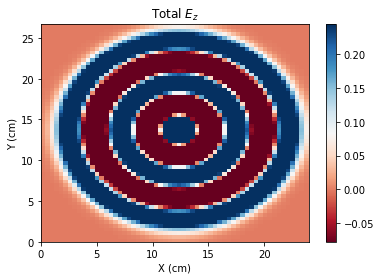

In [2]:
x = np.linspace(0, 60, IE)  #creating an 2d array for plotting
y = np.linspace(0, 60, JE)  #creating an y-axis
X,Y = np.meshgrid(x, y)     #Creating 2-d array

Z=ez                        #field to simulate
fig, ax = plt.subplots()    #Color Code: BrBG(Soil), RdBu(Air)
p = ax.pcolor(X/2.5, Y/2.25, 10*Z, cmap=cm.RdBu, vmin=(Z).min(), vmax=(Z).max())
cb = fig.colorbar(p)
plt.ylabel('Y (cm)')
plt.xlabel('X (cm)')
plt.title('Total $E_z$')

Text(0.5, 1.0, '$H_x$')

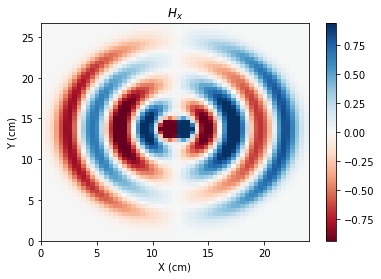

In [3]:
x = np.linspace(0, 60, IE)    #creating an x-axis
y = np.linspace(0, 60, JE)    #creating an y-axis
X,Y = np.meshgrid(x, y)       #Creating 2-d array

Z=hx                          #field to simulate
fig, ax = plt.subplots()      #Color Code: BrBG(Soil), RdBu(Air)
p = ax.pcolor(X/2.5, Y/2.25, 10*Z, cmap=cm.RdBu, vmin=(Z).min(), vmax=(Z).max())
cb = fig.colorbar(p)
plt.ylabel('Y (cm)')
plt.xlabel('X (cm)')
plt.title('$H_x$')

Text(0.5, 1.0, '$H_y$')

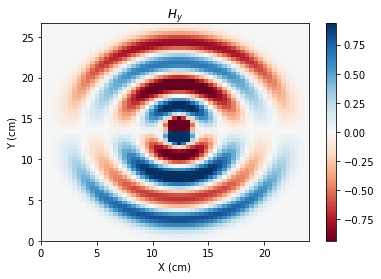

In [4]:
x = np.linspace(0, 60, IE)    #creating an x-axis
y = np.linspace(0, 60, JE)    #creating an y-axis
X,Y = np.meshgrid(x, y)       #Creating 2-d array

Z=hy                          #field to simulate
fig, ax = plt.subplots()      #Color Code: BrBG(Soil), RdBu(Air)
p = ax.pcolor(X/2.5, Y/2.25, 10*Z, cmap=cm.RdBu, vmin=(Z).min(), vmax=(Z).max())
cb = fig.colorbar(p)
plt.ylabel('Y (cm)')
plt.xlabel('X (cm)')
plt.title('$H_y$')